# How AI Understands Data & How We Prepare It 🧠

To build great AI applications (like RAG systems), you need to understand how LLMs "see" data. It's not just text in, text out!

In this notebook, we'll explore the **Three Pillars of AI Data**:

1.  **Tokens**: The atoms of language for AI.
2.  **Embeddings**: Converting text into meaning (numbers).
3.  **Chunking**: Breaking data into bite-sized pieces for the model.

---


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/13D7Mr1ulVmdG9KH5TG4aCSn58OTEngH6?usp=sharing)



## Master Generative AI in 8 Weeks
**What You'll Learn:**
- Master cutting-edge AI tools & frameworks
- 6 weeks of hands-on, project-based learning
- Weekly live mentorship sessions
- Join Innovation Community

Learn by building. Get expert mentorship and work on real AI projects.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)

In [ ]:
# Install dependencies
!pip install tiktoken numpy matplotlib scikit-learn

In [ ]:
import os
from google.colab import userdata

try:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
except Exception:
    pass

## 1. Tokens: The Atoms of Language ⚛️

We learned in the pricing guide that models read tokens, not words. But how does that actually look?

### Why does this matter?
- **Context Window**: Models have a limit (e.g., 128k tokens). You fit more if you tokenize efficiently.
- **Understanding**: Rare words might be broken into multiple tokens, which can confuse smaller models.

In [ ]:
import tiktoken

encoder = tiktoken.get_encoding("cl100k_base")

def show_tokens(text):
    tokens = encoder.encode(text)
    decoded = [encoder.decode([t]) for t in tokens]
    print(f"Original: {text}")
    print(f"Token IDs: {tokens}")
    print(f"Read as: {decoded}\n")

show_tokens("Apple")
show_tokens("ApplePie") # Compound words usually split
show_tokens("The quick brown fox jumps over the lazy dog.")

Original: Apple
Token IDs: [27665]
Read as: ['Apple']

Original: ApplePie
Token IDs: [27665, 72384]
Read as: ['Apple', 'Pie']

Original: The quick brown fox jumps over the lazy dog.
Token IDs: [791, 4062, 14198, 39935, 35308, 927, 279, 16053, 5679, 13]
Read as: ['The', ' quick', ' brown', ' fox', ' jumps', ' over', ' the', ' lazy', ' dog', '.']



## 2. Embeddings: Meaning as Numbers 🔢

Tokens are just integers. To understand *meaning*, AI converts these tokens into **Vectors** (lists of numbers).

### The Theory: Vector Space & Cosine Similarity
Imagine a huge multi-dimensional space (often 1536 dimensions for OpenAI models).
Every piece of text is a point in this space.

- **Vector**: A list of numbers representing the coordinates of that point.
- **Cosine Similarity**: The math used to measure distance. It checks the *angle* between two vectors.
    - **0 degrees (1.0)**: Identical meaning.
    - **90 degrees (0.0)**: Completely unrelated.
    - **180 degrees (-1.0)**: Opposite meaning.

### Semantic Search vs. Keyword Search
- **Keyword Search** (Old): Matches exact words. Fails if you search "canine" but the text says "dog".
- **Semantic Search** (AI): Matches *meaning*. "Canine" and "Dog" have vectors that are very close together, so it works!

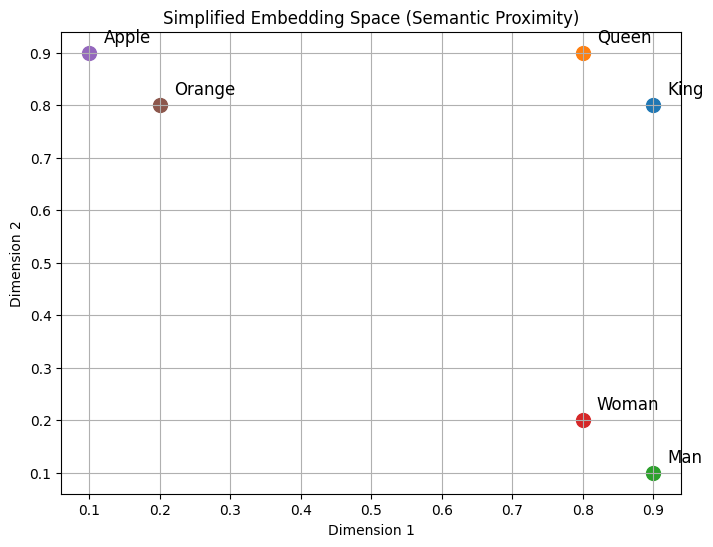

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


words = ["King", "Queen", "Man", "Woman", "Apple", "Orange"]
vectors = {
    "King": [0.9, 0.8],
    "Queen": [0.8, 0.9],
    "Man": [0.9, 0.1],
    "Woman": [0.8, 0.2],
    "Apple": [0.1, 0.9],
    "Orange": [0.2, 0.8]
}

plt.figure(figsize=(8, 6))
for word, vec in vectors.items():
    plt.scatter(vec[0], vec[1], s=100)
    plt.text(vec[0]+0.02, vec[1]+0.02, word, fontsize=12)

plt.title("Simplified Embedding Space (Semantic Proximity)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

## 3. Chunking: Preparing Data for AI 🍰

When you have a huge PDF or dataset, you can't feed it all to the LLM at once. You need to **Chunk** it.

### Why Overlap matters?
Notice in chunking we often use "overlap" (e.g., 50 tokens).
If we cut a sentence in half, we lose context.

**Example:**
- Chunk 1: "The secret code to the vault is..."
- Chunk 2: "...1234. Don't tell anyone!"

If we search for "vault code", we might get Chunk 1, but it doesn't have the answer! Overlapping ensures the important context (the code itself) appears fully in at least one chunk.

In [ ]:
# Example of a Simple Recursive Chunker logic

text = """
GenAI is fascinating. It changes how we work.

However, data preparation is key. Bad data = Bad AI.
This is why we chunk text.
"""

def simple_recursive_chunker(text, chunk_size=50):
    chunks = []
    # Split by double newline first (paragraphs)
    paragraphs = text.split("\n\n")

    current_chunk = ""

    for para in paragraphs:
        if len(current_chunk) + len(para) < chunk_size:
            current_chunk += para + "\n\n"
        else:
            chunks.append(current_chunk.strip())
            current_chunk = para + "\n\n"

    if current_chunk:
        chunks.append(current_chunk.strip())

    return chunks

chunks = simple_recursive_chunker(text, chunk_size=50)

print(f"Original Length: {len(text)}")
print(f"Number of Chunks: {len(chunks)}")
print("----")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: '{chunk}'")

Original Length: 128
Number of Chunks: 2
----
Chunk 1: 'GenAI is fascinating. It changes how we work.'
Chunk 2: 'However, data preparation is key. Bad data = Bad AI.
This is why we chunk text.'


## Conclusion 🏁

-   **Tokens** are the cost unit.
-   **Embeddings** are the meaning unit.
-   **Chunks** are the processing unit.

Master these three, and you're ready to build RAG (Retrieval Augmented Generation) apps!